# Touchscreen Lab 3: Capacitive Touchscreen

### EECS 16A: Designing Information Devices and Systems I, Summer 2020
<!---
PCB Design & Lab Design: Seiya Ono Su'20 (scono12@berkeley.edu)
--->

# Table of Contents

* [Instructions](#instructions)
* [Lab Policies](#policies)
* [Introduction](#overview)
* [Task 1: Understanding the PCB Touch Capacitor](#task1)
* [Task 2: Sensing Block](#task2)
    * [Task 2a: Understanding Charge-Sharing](#task2a)
    * [Task 2b: Automatic Switching](#task2b)
* [Task 3: Process Block](#task3)
    * [Task 3a: Understanding Comparators](#task3a)
    * [Task 3b: Op Amp Integrated Circuit Chip](#task3b)
    * [Task 3c: Setting up the Op Amp Chip](#task3c)
    * [Task 3d: Breadboarding the Sense \& Processing Blocks](#task3d)
* [Task 4: Actuation Block](#task4)
* [Task 5: Putting it All Together](#task5)
* [Checkoff](#checkoff)
    
<a id='instructions'></a>
## <span style='color:blue'>Instructions</span>
* Complete this lab by filling in all of the required sections, marked with **`YOUR CODE HERE`** or **`YOUR ANSWER HERE`**.
* When you finish, submit a checkoff request to get checked off for this lab. Be ready to answer a few questions to show your understanding of each section.
* Labs will be graded based on completion for teams of 2-4 students.

<a id='policies'></a>
## <span style='color:blue'>Lab Policies</span>
* **YOU MUST ATTEND THE LAB SECTION YOU ARE ENROLLED IN. If you anticipate missing a section, please notify your GSI in advance.**
* **You are free to stay for the full allotted time and hack around with the lab setup or code, but please keep the GSI's time in mind and do not work on unrelated assignments.**
* **Keep food and drinks (except water) away from your devices / equipment.**

<a id='overview'></a>

# <span style="color:blue">Introduction - Sensing, Processing, and Actuation</span>

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSsqf2T2CcBEfQAhJni1RBl4UwqT5FTe3sQ-dMOH-lJi4ueXOT0Qes1gfkUV0CatZi5izWIzDcPwkUk/pub?w=1485&h=784" style="height:400px"/></center>

Most electronic systems perform 3 major tasks: (1) <span style='color:orange'><b>Sense</b></span>, (2) <span style='color:green'><b>Process</b></span>, and (3) <span style='color:blue'><b>Actuate</b></span>. For sensing, sensors are used to transduce physical quantities to electrical signals. The electrical signals are then conditioned and processed for ease of readability. Finally, as an optional step, actuators are used to bring about physical change back into the tangible world. In this lab, we will use a capacitive touchpad to sense a touch, process the outputted electrical signal using a combination of additional circuit elements, and then actuate an indicator, an LED, to indicate that a touch has been detected. 

<a id='task1'></a>
# <span style="color:blue">Task 1: Understanding the PCB Touch Capacitor</span>

#### Materials & Equipment
* EECS16A Lab Booster Pack
* MSP430F5529 Launch Pad

The first objective is for us to understand how the touch capacitor changes its capacitance with a presence of a finger. In lecture, we have been modeling the Capacitive Touchscreen like this:

<center>
<img src="img/lec_touch.jpg" align="center" style="height:400px">
    </center>

However, due to the hardware limitations and safety concerns for our remote lab offering, we have provided you with in-PCB touch capacitors. A PCB is a printed circuit board, often coming in a [green color](https://www.seeedstudio.com/blog/2017/07/23/why-are-printed-circuit-boards-are-usually-green-in-colour/), and serves as a semi-permanent way to create circuits. It is the go-to way to make circuits after prototyping on breadboards, and can serve to make designs extremely compact, being able to utilize components that require resolutions in the micron scale.

The PCB we have provided you will be referred to as the **Boosterpack** from here on out. Take it out of your lab kit and inspect it.

<center>
<img src="img/boosterpack_top.jpg" style="height:400px">
<img src="img/boosterpack_side.jpg"  style="height:400px">
<img src="https://docs.google.com/drawings/d/e/2PACX-1vSh4NDIoVALgt_c-A-JGG9oD11LjqprLqwDhaYhCpSK9L1xnmhEI7gwk8sV8Gk5ngxlU-gI11fmAV9j/pub?w=1169&h=701" align="center" style="height:400px">
</center>


**Please leave your MSP <span style='color:red'>unplugged</span> from your computer. Most of the lab will be done without the MSP being plugged in.**

**<span style='color:red'>Plug in your Boosterpack into your MSP as the images show.</span> Caution: The correct orientation will have the 4 corner pins on the <span style='color:magenta'>top right</span> and <span style='color:purple'>bottom right</span>**.

All the parts have been pre-soldered onto the booster pack for use in this lab. In particular, focus on the labeled <span style='color:red; font-weight:bold'>C Pixel</span> - it should be right underneath the drawn in variable capacitor (the white text and white lines on a PCB are called "silkscreen"). You should be able to see a design of two light green polygons. The <span style='color:#33cc33'><b>light green</b></span> section of a PCB indicates where there is copper encapsulated under the green coating, where the <span style='color:#339933'><b>dark green</b></span> parts do not have copper underneath them. Simplified, the in-PCB touch capacitor can be modeled as the following:

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vRPkzuKEZcluhSjNUSfNgmvPUIHALcD3B-SFuXkJ15cO1V1HkOd4lpM8VEttQDKFBSMz5_Lja5K9CPd/pub?w=2203&h=1804" align="center" style="height:600px"></center>

The capacitors in the system have been labeled exactly as the model shown above, with <span style='color:red'><b>dimensions (in red)</b></span>, <span  style='color:orange'><b>capacitors (in yellow)</b></span>, and <span style='color:blue'><b><u>nodes (in blue)</u></b></span>. This view has the green part of the PCB removed, leaving only the copper, as shown in the image.

The above image can be then converted into a circuit schematic - we will be using this model as a means to quantify the capacitances in the touch capacitor.

<center><img src="img/cap_model.jpg" align="center" style="height:300px"></center>

**<span style="color:red">Using the following values and the reference diagram above, calculate the capacitance of the touch pixel with touch and no touch</span>**

$$C_{0} = \epsilon_\kappa \epsilon _0 \frac{t \times L}{d}$$

$$C_{no touch} = C_{0}$$

$$C_{touch} = C_{0} + C_{\Delta}$$

<br>

<center>
$\epsilon_\kappa \approx 4$, $\epsilon_0 = 8.854 \times 10^{-12} \frac{F}{m}$, $t = 100\mu m$, $L = 100mm$, $d = 0.1mm$, $C_{\Delta} = 1pF$
</center>

<br>

<center>
    $\text{milli (m)} = 10^{-3}$, $\text{micro (}\mu\text{)} = 10^{-6}$, $\text{nano (n)} = 10^{-9}$, $\text{pico (p)} = 10^{-12}$
</center>

In [1]:
4*8.854*1e-12*100*1e-6*100/0.1

3.5415999999999998e-12

|  | Touch Sensor Capacitance, $C_{pixel}$ |         
| ---: |:------------: |
| **Without finger $C_{notouch}$** | 3.5416 pF |
| **With finger $C_{touch}$**      | 4.5416 pF |

Save your calculated values here. You can use scientific notation in Python, `1e-12`, for 1pF.

In [2]:
c_pixel_no_touch = 3.5416e-12
c_pixel_w_touch  = 4.5416e-12

***

<a id='task2'></a>
# <span style="color:blue">Task 2: Sensing Block</span>

In this section, we'll focus on the theory and physical wiring of the sensing portion of system, utilizing the capacitive touch sensor, charge sharing, and switch controller integrated circuit chips.

Small note on notation: $V_{DD}$ and $V_{CC}$ are interchangeable, as they refer to the same power supply

<a id='task2a'></a>

## <span style="color:blue">Task 2a: Understanding Charge-Sharing</span>


The fundamental equation that relates capacitance, charge, and voltage is:
<br/>

<h3 align="center">$Q=CV$</h3> 

Explained in words, if you put a voltage $V$ across a capacitor with capacitance $C$, a charge of $Q$ develops on each plate of the capacitor. As we learned in the last section, touching the touch capacitor changes its capacitance. Therefore, to determine if the touchpad has been touched, all we need to do is measure the charge. 


In the example below, we charge $C_{pixel}$ (which in practice will be our capacitive touchpad pixel) using the voltage rail $V_{DD}$.

<center><img src="img/charge_sharing_1.png" align="center" style="height:400px"></center>

**Note: Circuit elements that have a diagonal arrow going through them, like $C_{pixel}$ shown above, mean that the component's value is variable. In this case, the symbol for $C_{pixel}$ is variable because it has one capacitance value when it is not being touched and another capacitance value when it is.**

If we disconnect the top plate of $C_{pixel}$ from the voltage source, the charge is retained on each plate of $C_{pixel}$ (and will still be equal to $C_{pixel} V_{DD}$ based on our equation). If we then connect the top plate of $C_{pixel}$ to another capacitor $C_{ref}$, we have created a pair of parallel capacitors as shown in the image below. 

<center><img src="img/charge_sharing_2.png" align="center" style="height:400px"></center>

As we've learned, two capacitors in parallel create a larger effective capacitance, $C_{total} = C_{pixel} + C_{ref}$. We also know that the charge in the circuit remains constant because we did not let any charge flow into or out of the circuit. $Q = CV$ must remain true, so since $C$ increased, and $Q$ remained constant, $V$ across both of the capacitors  must change. A finger present will change the value of $C_{pixel}$, which will affect the total amount of charge available in the system.

**<span style="color:red">What is the voltage across the capacitors after the above steps have been taken? Your answer should be a function of $V_{DD}, C_{pixel},$ and $C_{ref}$.**

`YOUR ANSWER HERE`
$C_{pixel}V_{DD}\over{C_{pixel}+C_{ref}}$

**Now that we have a fundamental understanding of charge sharing, we can move on to the circuit we are going to be building today. Let us first go through the circuit topology to understand what the end goal is.**

For this lab, we will be controlling the charging and discharging of these capacitors with a set of switches. The process is outlined below:

<br></br>
## <center><font color=red><i>$\text{Do not build anything right now. Just read and enjoy.}$</i></font></center>

Small note on notation: $V_{DD}$ and $V_{CC}$ are interchangeable, as they refer to the same power supply

**Disclaimer: $C_{ref}/V_{+}$ is the name of a node. We realize that this can be very confusing, but unfortunately it cannot be changed on the PCB**

### 1. Make sure both capacitors are discharged.
We begin by connecting the Clean Switch to $GND$ to make sure both capacitors are completely discharged.

<center><img src="img/switch_cap_discharge.png" align="center" style="height:400px"></center>

### 2. Disconnect the short to ground used for discharging.
Now that the capacitors are completely discharged, we can remove the connection to ground. If we do not remove this switch, our capacitors are always connected to ground, which is bad.

<center><img src="img/switch_cap_read.png" align="center" style="height:400px"></center>

### 3. Charge the $C_{pixel}$ capacitor to $V_{DD}$.
Next we connect the capacitor to a voltage source and charge it to $V_{DD}$.

<center><img src="img/switch_cap_charge.png" align="center" style="height:400px"></center>

### 4. Share charge between $C_{pixel}$ and $C_{ref}$.
The Drive Switch is switched over to charge share with the fixed capacitor, producing a voltage that can be read out at $C_{ref}/V_{+}$.

<center><img src="img/switch_cap_read_2.png" align="center" style="height:400px"></center>

### All 4 phases in action:
<br>
<img src="img/switch_cap.gif" align="left" style="height:400px; padding:25px"/>

The speed of this GIF (pronounced like "gift" without the "t") of all four phases of our charge sharing circuit is 1 second per phase. In reality, the speed of the switching is much faster$-$on the order of a millisecond. More information on the switches is explored in the next section.

Now that you have all four phases of our charge sharing circuit, you can start to explore what happens to the voltage across the capacitors at the end of phase 4, as the value of $C_{pixel}$ changes due to being touched.

And remember, charge is conserved when changing from one phase to another: notably between phase 3 and phase 4.<br><br>
<span stlye='font-size:150%'>$$Q=CV \longrightarrow Q_{\textrm{phase }3}=Q_{\textrm{phase }4}$$</span>


**<span style="color:red">When the Drive Switch is closed ($OUT$ connected to $X$) after $C_{pixel}$ is charged (i.e. in phase 4 and after steady state has been reached), how much total charge $Q$ is available to the system?**

`YOUR ANSWER HERE`
$V_{DD}C_{pixel}$

Run this code block to recall your calculated values from above.

In [3]:
print("C Pixel no touch:   {}\nC Pixel with touch: {}".format(c_pixel_no_touch, c_pixel_w_touch))

C Pixel no touch:   3.5416e-12
C Pixel with touch: 4.5416e-12


**<span style="color:red">Assuming the steps above are performed in order, calculate the voltage across the two capacitors at the end of phase 4. Perform the calculations using your calculated $C_{pixel}$ value *without* your finger.** **Use the following values:**

In [5]:
3.3*c_pixel_no_touch/(c_pixel_no_touch+22e-12)

0.45757822532652614

$$V_{DD} = 3.3V \hspace{2cm} C_{ref} = 22pF$$

|  | $C_{ref}/V_{+}$ |         
| ---: |:------------: |
|$C_{pixel\_no\_touch}$| `YOUR ANSWER HERE`0.458V|

In [6]:
3.3*c_pixel_w_touch/(c_pixel_w_touch+22e-12)

0.5646713084365674

**<span style="color:red">As explained above, we can model a touch as placing an additional capacitor, also connected to ground, in parallel with $C_{pixel}$, which increases the capacitance. Calculate the voltage across the two capacitors at the end of phase 4. Perform the calculation using your calculated $C_{pixel}$ value *with* your finger.</span>** **Use the following values:**

**<font color=black>Note: This means you're running through all 4 phases again, but with a different $C_{pixel}$ value.</font>**

$$V_{DD} = 3.3V \hspace{2cm} C_{ref}=22pF$$

|  | $C_{ref}/V_{+}$ |         
| ---: |:------------: |
|$C_{pixel\_touch}$| `YOUR ANSWER HERE`0.565V|

In [7]:
v_no_touch = 0.458
v_w_touch  = 0.565

<a id='task2b'></a>

## <span style="color:blue">Task 2b: Automatic Switching</span>
**Now we will go over how the Drive Switch and Clean Switch work and are implemented using individual switches in the switches on the Boosterpack**

<!----
#### Materials
* Launchpad MSP430 - Kit
* Breadboard - Kit
* 1 Switch Controller - Kit (picture shown below)
* More Wires - GSI Desk
* Power Supply Wires - Back Wall
* 2x Oscilloscope Probes (don't forget to test!) - Back Wall
---->

This is the same diagram as above, notating the different parts of the EECS16A Lab Boosterpack.

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSh4NDIoVALgt_c-A-JGG9oD11LjqprLqwDhaYhCpSK9L1xnmhEI7gwk8sV8Gk5ngxlU-gI11fmAV9j/pub?w=1169&h=701" align="center" style="height:400px"></center>

The two small <span style='color:orange;font-weight:bold'>black rectangles</span> are the switches that we have implemented for you - they will handle the automatic switching. We will go over how these switches operate, and why we must use them to realize our capacitive touchscreen circuit.

### <span style="color:blue">Integrated Switches</span>
The capacitors in our touch sensing charge sharing circuit will discharge within a few milliseconds (because capacitors aren't perfect and don't hold charge forever). Therefore, we need to automate the switching process for the touchscreen to work. In order to change the switches rapidly, we will use the two [BL1551](https://www.belling.com.cn/media/file_object/bel_product/BL1551/datasheet/BL1551_V1.1_en.pdf) [integrated circuit switches](http://en.wikipedia.org/wiki/Integrated_circuit) (IC). 
<br><br>
Look at the images below. Each of those open circles represents a different terminal of the switch. By using the Launchpad to rapidly change the voltage on the $CTRL$ (control) terminal, we will change which terminal ($X$ or $Y$) is connected to the switch output. 
<br><br>

<p>
<img src="img/switch-high.png" align="left" style="height:200px">
<img src="img/switch-low.png" align="left" style="height:200px">
The circuit symbols to the left indicate how the switch operates. There is one side that has one connection that is always connected, $OUT$, and two connections on the other side, $X$ and $Y$. Which connection the switch makes depends on the voltage at the control pin for the switch, labeled $CTRL$.
</p>

***Operation:***

$\longrightarrow$ If $CTRL$ is connected to $V_{DD}$, the switch moves up to connect $OUT$ to $Y$.

$\longrightarrow$ If $CTRL$ is connected to ground ($GND$), the switch moves down to connect $OUT$ to $X$.
<br>
<br>
The good news is, we do not expect you to implement the switch logic yourself, as the careful timing adjustments have already been done for you. The design of this system is outside of the scope of the class, and we would like you to focus more on the circuit theory and breadboarding experience, not the fine tuning of timings.

After exploring the charge sharing principles in the sense block, we will now move forward to discuss the processing block. We will be exploring Op Amps as comparators, and how they can be used to processes this change in voltage.

<center><span style='font-size:20px; font-weight:bold'>This completes our Sensing block!</span></center>

***

<a id='task3'></a>
# <span style="color:blue">Task 3: Process Block</span>

In this section, we'll focus on the theory and physical wiring of the processing portion of the system, utilizing an Op Amp as a comparator.

<a id='task3a'></a>

## <span style="color:blue">Task 3a: Understanding Comparators</span>


Operational amplifiers, or op-amps, can be used to compare two voltage values and output a desired voltage depending on the result. This is what we call a **comparator**. View the schematic below:

<center><img src="img/comparator-graphic.gif" style="height:250px"></center>
    
<center><font size=1>https://www.electronics-tutorials.ws/opamp/op-amp-comparator.html</font></center>

<br>

An input voltage ($V_{IN}$) is compared to a reference voltage ($V_{REF}$). If $V_{IN}$ is <font color=green><b>greater than</b></font> $V_{REF}$, the output of the op-amp ($V_{OUT}$) is the <font color=red><b>positive supply rail voltage</b></font> ($+V_{CC}$ in this particular diagram). If $V_{IN}$ is <font color=orange><b>less than</b></font> $V_{REF}$, $V_{OUT}$ is the <b>negative supply rail voltage</b> ($-V_{CC}$ in this particular diagram).

The graph on the right shows that the voltage difference is a linear response with the slope dictated by the op-amp's gain. However, once the amplified voltage difference reaches a saturation point where $V_{OUT}$ becomes limited by the supply rail voltages, $+V_{CC}$ and $-V_{CC}$. The linear region output can occur if $V_{IN}$ is close in value to $V_{REF}$, but for the sake of our labs, this difference is always large enough to reach the saturation region.

**<center>In the next sections, you will use an Op Amp to implement a comparator for the processing block.</center>**


<a id='task3b'></a>

## <span style="color:blue">Task 3b: Op Amp Integrated Circuit Chip</span>

Now we will go over how the comparator is implemented using a dual Op Amp chip.

<font color=red><b>Reminder</b></font>: Reference the [Lab Equipment Guide](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub) for information about your lab kit

### <span style="color:blue">Dual Op AMP IC</span>


<div class="pull-right"><figure><img src="img/8-DIP.png" align='right' style="height:170px"></figure></div>

To implement our comparator, we will use a dual Op Amp chip. This means that a single chip contains two separate Op Amps. This is important because our processing block will only use one of the two Op Amps. For reference, we are using the LMC6482 IC chip, which should be found in your lab kit.
<br>

Pictured below is a graphic of the chip we are using as well as its pinout. The notch indicates the top of the chip, and should be used to orient the chip. The pins are numbered sequentially as you go counter-clockwise around the chip. As you can see, there are two separate Opo Amps in the chip, labeled `A` and `B`, each with their own input and output terminals. However, both Op Amps share the same positive and negative supply rail voltages, labeled $V^+$ and $V^-$ in the diagram below.
<br>
<br>

**<center>Make sure the notch on the IC chip is on top</center>**


<center><img src="img/opamp-with-chip.png" align="center" style="height:275px"></center>

<center><span style="font-size:9pt;align:center"><a href='http://www.ti.com/lit/ds/symlink/lmc6482.pdf'>Additional details</a></span></center>
<br/>

**It is worth noting that the notation used for labeling the Op Amps is a bit different than class, so please be careful when referring to the terminal labels. We have tried to avoid ambiguity by labeling $+/-$ terminals with only a $+$ or $-$ sign, and labeling supply voltages using words, as shown below:**
<br>

**<center><font color="blue">Op Amp IC Pin Assignments (Always Shown in BLUE)</font></center>**

|**Op Amp Label**| `+` pin | `-` pin | `OUT` pin |         
| :---: |:------------: | :---: | :---: | 
|$A$| $\color{blue}{(3)}$ | $\color{blue}{(2)}$ | $\color{blue}{(1)}$ |
|$B$| $\color{blue}{(5)}$ | $\color{blue}{(6)}$ | $\color{blue}{(7)}$ |

$$\textrm{Positive Supply Voltage: }\color{blue}{(8)}$$
$$\textrm{Negative Supply Voltage: }\color{blue}{(4)}$$

<br>

*Note: In circuit theory, we sometimes do not explicitly draw the Power Supply Rails ($V^{+}$ and $V^{-}$) because we assume them to be infinitely positive or infinitely negative compared to our signal so we can focus more on analysis than implementation.*

<a id='task3c'></a>

## <span style="color:blue">Task 3c: Setting up the Op Amp Chip</span>

<font color=red><b>Reminder</b></font>: Reference the [Lab Equipment Guide](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub) for information about your lab kit

#### Materials
* Breadboard - Kit
* 1x LMC6482 Op Amp Chip - Kit
* 2x Male-to-Female Wires - Kit
* 1x Male-to-Male Wires - Kit
* Lab Boosterpack - Kit
* MSP430 (unplugged) - Kit

The LMC6482 Dual Op Amp Chip comes in a package known as 8-DIP (8 pin dual in-line package) where there are 8 different pins that come out of it, ready to be plugged into a breadboard. We have to remember that because breadboard pins are connected horizontally, we cannot plug in the Op Amp into either only the left or only the right sides - we must separate the two sides of the chip with the divider in the middle of the breadboard. This will ensure that the pins on either side of the Op Amp are not shorted together. **Follow the diagram below and plug in your LMC6482 Dual Op Amp Chip into the middle of your breadboard.**. 

<br>

<center><font color=red size=5><b>Make sure that the notch (semi-circle) is pointed up!</b></font></center>


<center><img src="img/opamp_only_bb.png" align="center" style="height:400px"></center>

<center><img src="img/opamp-with-chip.png" align="center" style="height:150px"></center>

Next, connect two different **Male-to-Female** jumper wires from the two points indicated on the breadboard to the Lab Booster Pack. The male end should go into the breadboard, and the female end should plug into the boosterpack, where the pins are labeled `3.3V` and `GND` circled in <font color=blue><b>Blue</b></font> in the picture below. At this point, the <font color=red><b>MSP should NOT be plugged into your computer</b></font>. Once again, make sure that the Op Amp is plugged in with the correct orientation with the half circle notch face up. Use the **Male-to-Male** wire to connect the $V^{-}$ connection on the LMC6482 chip to the `GND` rail <span style='color:blue;font-weight:bold'>(-)</span> on your breadboard.

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSh4NDIoVALgt_c-A-JGG9oD11LjqprLqwDhaYhCpSK9L1xnmhEI7gwk8sV8Gk5ngxlU-gI11fmAV9j/pub?w=1169&h=701" style="height:250px"></center>

<a id='task3d'></a>

## <span style="color:blue">Task 3d: Breadboarding the Sense \& Process Blocks</span>

<font color=red><b>Reminder</b></font>: Reference the [Lab Equipment Guide](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub) for information about your lab kit

#### Materials
* Breadboard + MSP + Boosterpack - Previous Subsection
* 1x  $22pF$ Capacitor ([smaller rounder capacitor](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub#h.wwd5jmoh5lr4)) - Kit
* 1x $100k\Omega$ Resistor (brown - black - yellow - gold) - Kit
* 2x Male-to-Female Wires - Kit

With the Op Amp chip in place and power wires connected to the breadboard (with the MSP **unplugged** from your PC), it is time to start building the <font color=orange><b>Sense</b></font> and <font color=green><b>Process</b></font> blocks onto the breadboard. Below is a circuit schematic view of what you will be implementing. **Do not start breadboarding yet**.

<center><img src="img/sense-process-schematic.png" align="center" style="height:300px"></center>

Comparing this schematic with your current breadboard, you should already have the Op Amp, $3.3V$, and Ground in place (double check to see if the $V^-$ of the Op Amp is connected to the ground rail). You are missing the following:

1. $22pF$ Capacitor ([smaller rounder capacitor](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub#h.wwd5jmoh5lr4))
1. $100k\Omega$ Resistor (Brown - Black - Yellow - Gold)
1. $V_x$ (from Boosterpack; use a Male-Female jumper wire)
1. $C_{ref}/V_+$ (from Boosterpack; use a Male-Female jumper wire)

<font color=red><b>Now is the time to breadboard</b></font>. Add the missing components in the list above in order (adding in components before wires is usually easier). To find $V_x$ and $C_{ref}/V_+$ on the Boosterpack, see the image below and find the text on the Booster pack that corresponds to the pin in the area circled in <span style='color:blue; font-weight:bold'>blue</span>. Remember that the rows of the breadboard are connected, and use the LMC6482 pinout diagram to figure out where the Op Amp resides in the chip. For the sake of consistency, we will ask you to use **Op Amp A**. The terminals of the Op Amp have been labeled in blue Serif text on the schematic - these number correspond to the pin numbers on the pinout diagram for the LMC6482.

Tips when breadboarding:
1. Take your time - trace all the nodes on both the schematic and breadboard to make sure they are connected either through a wire or through the breadboard.
2. Closely reference the pinout diagram - this is the only way to know where the Op Amp is in the chip. 
3. Use the `GND` rail - it goes all the way up and down the breadboard because it is a very common connection point, use it!

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSh4NDIoVALgt_c-A-JGG9oD11LjqprLqwDhaYhCpSK9L1xnmhEI7gwk8sV8Gk5ngxlU-gI11fmAV9j/pub?w=1169&h=701" style="height:250px"> <img src="img/opamp-with-chip.png" style="height:150px"> </center>

<center><img src="img/sense-process-schematic.png" align="center" style="height:500px"></center>

Double check to make sure your breadboarded circuit matches the schematic above. A couple questions to ask yourself:
1. Do I have a resistor and a capacitor in the breadboard? 
1. Are they the $22pF$ and $100k\Omega$ variants? (*Note on resistor below*)
1. Are all four pins from the Boosterpack connected to the breadboard? Did I mix any of them up?
1. Is the Op Amp plugged in correctly with the notch facing up? 
1. Unplug your Op Amp to make sure non of the pins have been accidentally bent and folded underneath the chip.

With this part of the circuit complete, we can now decide on a $V_{x}$ value, which we will also be referring to as $V_{ref}$. It is called $V_{x}$ on the Boosterpack because it is a variable output, hence the $x$. In this specific circuit, we are comparing this “reference” voltage to our charge sharing node voltage, hence the $V_{ref}$ name.

**Why is there a resistor?**

In lecture, we do not discuss the touchscreen circuit with the $100k\Omega$ resistor - so why does it exist in lab? Conceptually, the circuit would function correctly without the resistor. The resistor only adds a discharge path for the shared charge, making current leak *out* of the capacitors, making the circuit worse, is what some of you might be able to figure out on paper. While this is true, the $100k\Omega$ resistor also helps to stabilize the $V_{+}$ node. If the resistor is not there, the $V_{+}$ node is left completely floating, as the input resistance of the Op Amp is infinite, and the node is completely disconnected from any power or ground. Floating nodes traditionally are not very stable (as the name might also imply) and are very susceptible  to background electrical interference. By draining the shared charge slowly, this creates a reference to ground, making the node stable, increasing the repeatability and robustness of the circuit.

**Picking a $V_{ref}$ Value**

Run the code block below to recall your $V_{+}$ terminal <span style='color:blue'>$(3)$</span> voltages for both no touch and with touch scenarios.

In [8]:
print("V+ no touch: {}\nV+ with touch: {}".format(v_no_touch, v_w_touch))

V+ no touch: 0.458
V+ with touch: 0.565


We must choose a $V_{ref}$ value that is suitable to distinguish between these two voltages. 

<span style='color:red;font-weight:bold'>Select a voltage reference $V_{ref}$ such that the output of the Op Amp will be $0V$ when there is no touch and $3.3V$ when there is a touch detected.</span>

*Hint: You probably don't want to pick values that are exactly `V+ no touch` or `V+ with touch` since that would allow for no margin of error.*

In [9]:
(0.458+0.565)/2

0.5115


|**Chosen $V_{ref}$** |         
| :---: | 
| `YOUR ANSWER HERE` 0.5V|


<center><span style='font-size:20px; font-weight:bold'>This completes our Processing block!</span></center>

***

<a id='task4'></a>

# <span style="color:blue">Task 4: Actuation Block</span>

<font color=red><b>Reminder</b></font>: Reference the [Lab Equipment Guide](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub) for information about your lab kit

#### Materials
* Previous Breadboarded Circuit with MSP + Boosterpack
* 1x 330 Ohm Resistor (Orange-Orange-Brown-Gold) - Kit
* 1x LED (any color) - Kit

We will be finishing off the lab by adding the actuation block. We would like our circuit to actuate an LED whenever there is a touch present. To do this, we will add the LED and a current limiting resistor to the output of the Op Amp from the circuit we have already breadboarded in the previous section. Observe the complete circuit schematic below.

<center><img src="img/breadboard-full-schematic.png" align="center" style="height:400px"></center>

<center> <img src="img/opamp-with-chip.png" style="height:150px"> </center>

Using both the schematic and the LMC6482 pin out digram, <span style='color:red;font-weight:bold'>add in an LED and $330\Omega$ resistor (orange-orange-brown-gold)</span>. **The LED has directionality - the longer leg should go to the output of the Op Amp, and the shorter leg to the resistor**. The MSP should still **not be plugged in**. Some questions to ask yourself:

1. Is the node between the LED and resistor properly its own node? Make sure that the short leg of the LED and the resistor are **not** connected to the output of the Op Amp.
1. Is the resistor going to ground? Make sure the current has somewhere to go, else the LED cannot turn on.
1. Am I using the right output of the Op Amp? We are using Op Amp A, so the output pin should be pin number one <span style='color:blue'>$(1)$</span>.

If you would like to reveal a render of a correct breadboard setup, run the code block below. **This will give you the exact set up to do this lab, if you don't want to be spoiled, do not run this code cell**.

You are about to view the solution breadboard. Hit Enter to proceed.


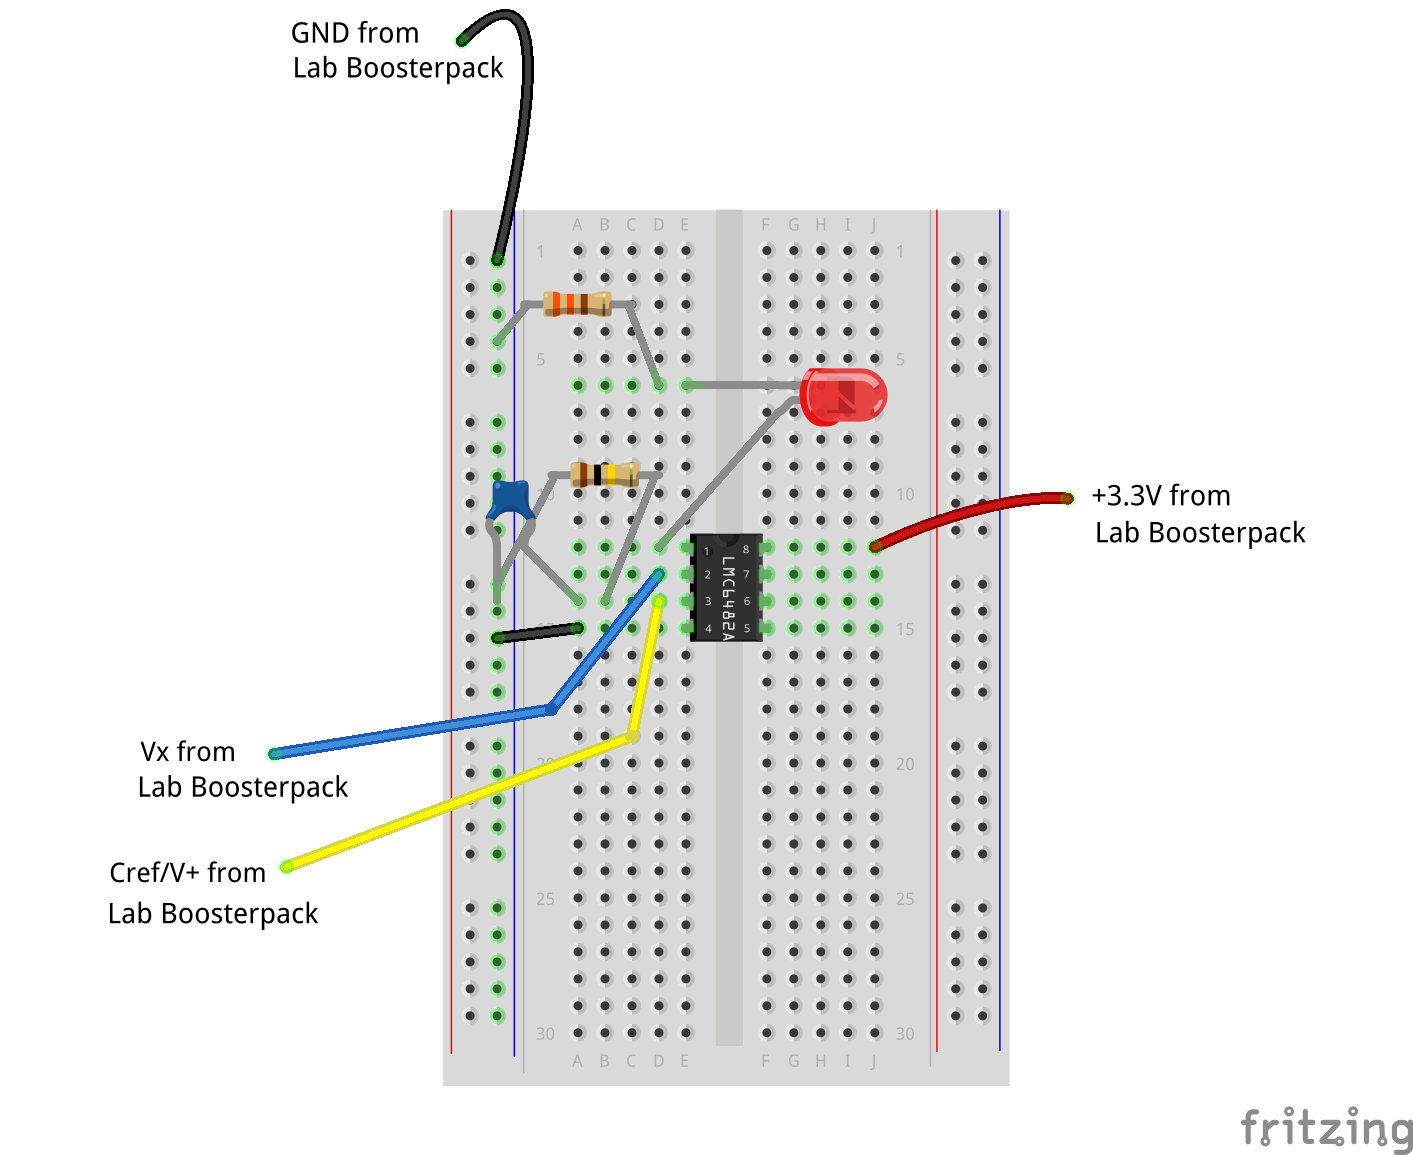

In [10]:
from IPython.display import Image
input("You are about to view the solution breadboard. Hit Enter to proceed.") 
Image(filename='img/complete_bb.png')

The full circuit with the Boosterpack is outlined below. Everything on the left hand side of the green arrows are components that are on the Boosterpack. At this point, <span style='color:red;font-weight:bold'>you should have the entire circuit completed on your breadboard</span>, with four Male-to-Female wires going from the Boosterpack to different parts of the breadboard.

<center><img src="https://docs.google.com/drawings/d/e/2PACX-1vSHHT49WBrOs16aBaWSTP0Kl6WpNvuVPcGPgDEhfE-q6l3GeIbJQ1dO4cyOkMR5uv4WtJO3Oan8yW-d/pub?w=1433&h=753" align="center" style="height:455px"></center>

<center><span style='font-size:20px; font-weight:bold'>This completes our Actuation block!</span></center>

***

<a id='task5'></a>

# <span style="color:blue">Task 5: Putting it All Together</span>

<font color=red><b>Reminder</b></font>: Reference the [Lab Equipment Guide](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub) for information about your lab kit

Now that we have the full circuit set up, the MSP can be powered up and code can be uploaded to it in order to control the switches. <span style='color:red;font-weight:bold'>Plug in your MSP to your computer</span>.

Download the `Switch_Control` folder from this [Google Drive link](https://drive.google.com/drive/folders/15P9tqdxyDShqX2xo0ufACVt8UqQ80u8H?usp=sharing). If you cannot access the Google Drive link above, you can go back to your home tab of the notebook (most likely the tab in your browser that is one to the left of this one), and download the file from there.

You will be uploading this sketch to the MSP. Read the section on [**Uploading Code**](https://docs.google.com/document/d/e/2PACX-1vTVrGBDbRfVI0_LjSeTfw8doili8iS_E_9Fwdk2UShgf7WAgVVoHtyMOpjXadXwD45HNXUbb2ASF18H/pub#h.6wu473h55i4) in the Lab Equipment Guide to jog your memory.

Once uploaded, open up **Serial Monitor** either by hitting `Ctrl+Shift+M` or going to `Tools>Serial Monitor`. **Hit the RST button on the MSP** and you should be greeted with `Starting Capacitive Touchscreen Switch Control` text box. If not, make sure that your baud rate is properly set to **`115200`** or try reuploading.

The code will automatically start toggling the Drive and Clean switches at a fine tuned rhythm. In the **Serial Monitor**, you are given the freedom to set $V_{ref}$, or on the Boosterpack, $V_{x}$, to any voltage you desire, between $0V$ and $3.3V$. You can do this by simply typing a voltage value (without the 'V') into the text box and hitting `Enter` or clicking `Send`. After you do that, you should see text pop up notifying you that you have set the DAC to the voltage you desired.

**DAC** stands for Digital-to-Analog Converter, which take a Digital input (the number you typed) and converts it to an analog voltage (the voltage being driven at $V_{x}$). <span style='color:red;font-weight:bold'>The default DAC value is 0.5V</span>. This is the $V_{ref}$ that is estimated to work best with a properly built circuit. 

<center><img src="img/switch_control.png" align="center" style="height:500px"></center>

With $V_{ref}$ set to $0.5V$, your circuit should operate correctly. **Placing your finger on the $C_{pixel}$ region on the Boosterpack should result in the LED turning on.**

<center><img src="img/realworld.png" align="center" style="height:300px"></center>
<br>
If the desired behavior is not achieved, here are a few potential debugging points to look out for with the full schematic pictures below:

<center><img src="img/breadboard-full-schematic.png" align="center" style="height:400px"></center>

<center> <img src="img/opamp-with-chip.png" style="height:150px"> </center>

1. Make sure all your Boosterpack connections are going where they are supposed to be. Cross check the Boosterpack text (silkscreen) and follow the wire to a node. Make sure that the node it is traveling to is correct by checking the schematic.
1. Double check your capacitor. The one you should be using is the $22pF$ capacitor which is much shorter than the $0.1uF$ capacitor. The $22pF$ capacitor is also perfectly round and has "22" written on the back of it (it might have rubbed off).
1. Check to see if your LED is the right orientation - the long leg should be going to the Op Amp output, and the short leg to a resistor. The resistor should **not** be connected to the Op Amp output.
1. Enter `0.5` into the Serial Monitor to make sure $V_{ref}$ is set to $0.5V$.

After some cross checking and you cannot find the error, ask your lab group for advice, or call over a TA.

## Congratulations! You have successfully implemented a capacitive touch pixel!

<a id='checkoff'></a>
## Checkoff
When you are ready to get checked off,
1. Fill out the checkoff google form. **[Checkoff Form](https://forms.gle/TLjsE68kEf8QpcWa9)**
2. Submit a **checkoff** request on the lab queue. **[Checkoff queue](https://lab.eecs16a.org)** It is fine if only one person from your group submits the queue request, but everyone must submit their own google form. 

Your GSI or a Lab Assistant will join your breakout room when they are available and go through some checkoff questions with your group. They will go through the checkoff list in order. Please be patient!

## **<span style="color:red"> Do not take apart your setup before being checked off. </span>**

<!--"Oh hey." - Thomas, Sp18-->
<!--"Oh hey there" - Seiya, Su20-->